In [1]:
import mplfinance as mpf
import pandas as pd
import ta
import optuna
import time
import numpy as np
from multiprocessing import Pool
from itertools import combinations, chain
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import warnings
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
from utils.utils import plot_candle_chart, file_features, buy_signals_1d_dl, buy_signals_1h_dl, buy_signals_1m_dl, buy_signals_5m_dl, buy_sell, backtest1
from utils.utils import sell_signals_1d_dl, sell_signals_1h_dl, sell_signals_1m_dl, sell_signals_5m_dl, plot_buy_sell_signals_dl, data_fun, plot_signals, plot_transacciones
from utils.utils import backtest, plot_operations_history, port_value_plot, plot_cash, cash_portvalue_plot, pasive_portvalue_plot, create_and_compile_dnn_model

### Equipo:
- 727671 - Daniela Natalia Barajas García
- 733462 - Lucía Cruz Ramírez
- 733481 - Elías Hernández Alarcón
- 728469 - Juan Pedro Sánchez Galaz

# Deep Learning

Nuestro proyecto de análisis mediante deep learning se centra en la exploración y modelado de conjuntos de datos de validación proporcionados durante las primeras etapas del curso. Nos adentramos en la información financiera de la empresa AAPL (Apple Inc.), llevando a cabo un análisis exhaustivo de sus datos de precios de cierre, máximos, mínimos y otros indicadores pertinentes.

Los siguientes datos servirán como la base sobre la cual aplicaremos técnicas de deep learning para extraer patrones y realizar predicciones precisas sobre el comportamiento futuro de AAPL en el mercado financiero.

In [3]:
data_1d = data_fun("data/aapl_1d_test.csv")
data_1h = data_fun("data/aapl_1h_test.csv")
data_1m = data_fun("data/aapl_1m_test.csv")
data_5m = data_fun("data/aapl_5m_test.csv")
data_1d.head()

,Date,Open,High,Low,Close,Adjusted_close,Volume
0,2021-02-17,131.25,132.22,129.47,130.84,128.7615,97918500
1,2021-02-18,129.20,130.00,127.41,129.71,127.6494,96856700
2,2021-02-19,130.24,130.71,128.80,129.87,127.8069,87668800
3,2021-02-22,128.01,129.72,125.60,126.00,123.9984,103916400
4,2021-02-23,123.76,126.71,118.39,125.86,123.8606,158273000


    Fecha: Indica la fecha en que se registraron los datos de precios de las acciones de Apple. Es esencial para seguir la evolución del precio a lo largo del tiempo y detectar patrones y tendencias.

    Apertura: Es el primer precio al que se negociaron las acciones de Apple en el día. Proporciona una indicación inicial de la dirección en que el precio puede moverse durante la jornada.

    Alto: Es el precio más alto alcanzado durante el día de negociación para las acciones de Apple. Indica el máximo alcanzado y la fuerza alcista del mercado.

    Bajo: Es el precio más bajo alcanzado durante el día de negociación. Indica el mínimo y la presión de venta en el mercado.

    Cierre: Es el último precio al que se negociaron las acciones en el día. Es uno de los más importantes, reflejando el valor final al que los inversores están dispuestos a comprar o vender las acciones.

    Cierre Ajustado: Considera eventos corporativos que afecten el precio de las acciones, como divisiones de acciones o dividendos. Ofrece una medida más precisa del rendimiento del precio de las acciones.

    Volumen: Indica la cantidad total de acciones de Apple negociadas durante el día. Puede señalar la fuerza detrás de los movimientos de precios: un alto volumen sugiere mayor interés y actividad, mientras que un bajo volumen puede indicar menor participación y volatilidad.

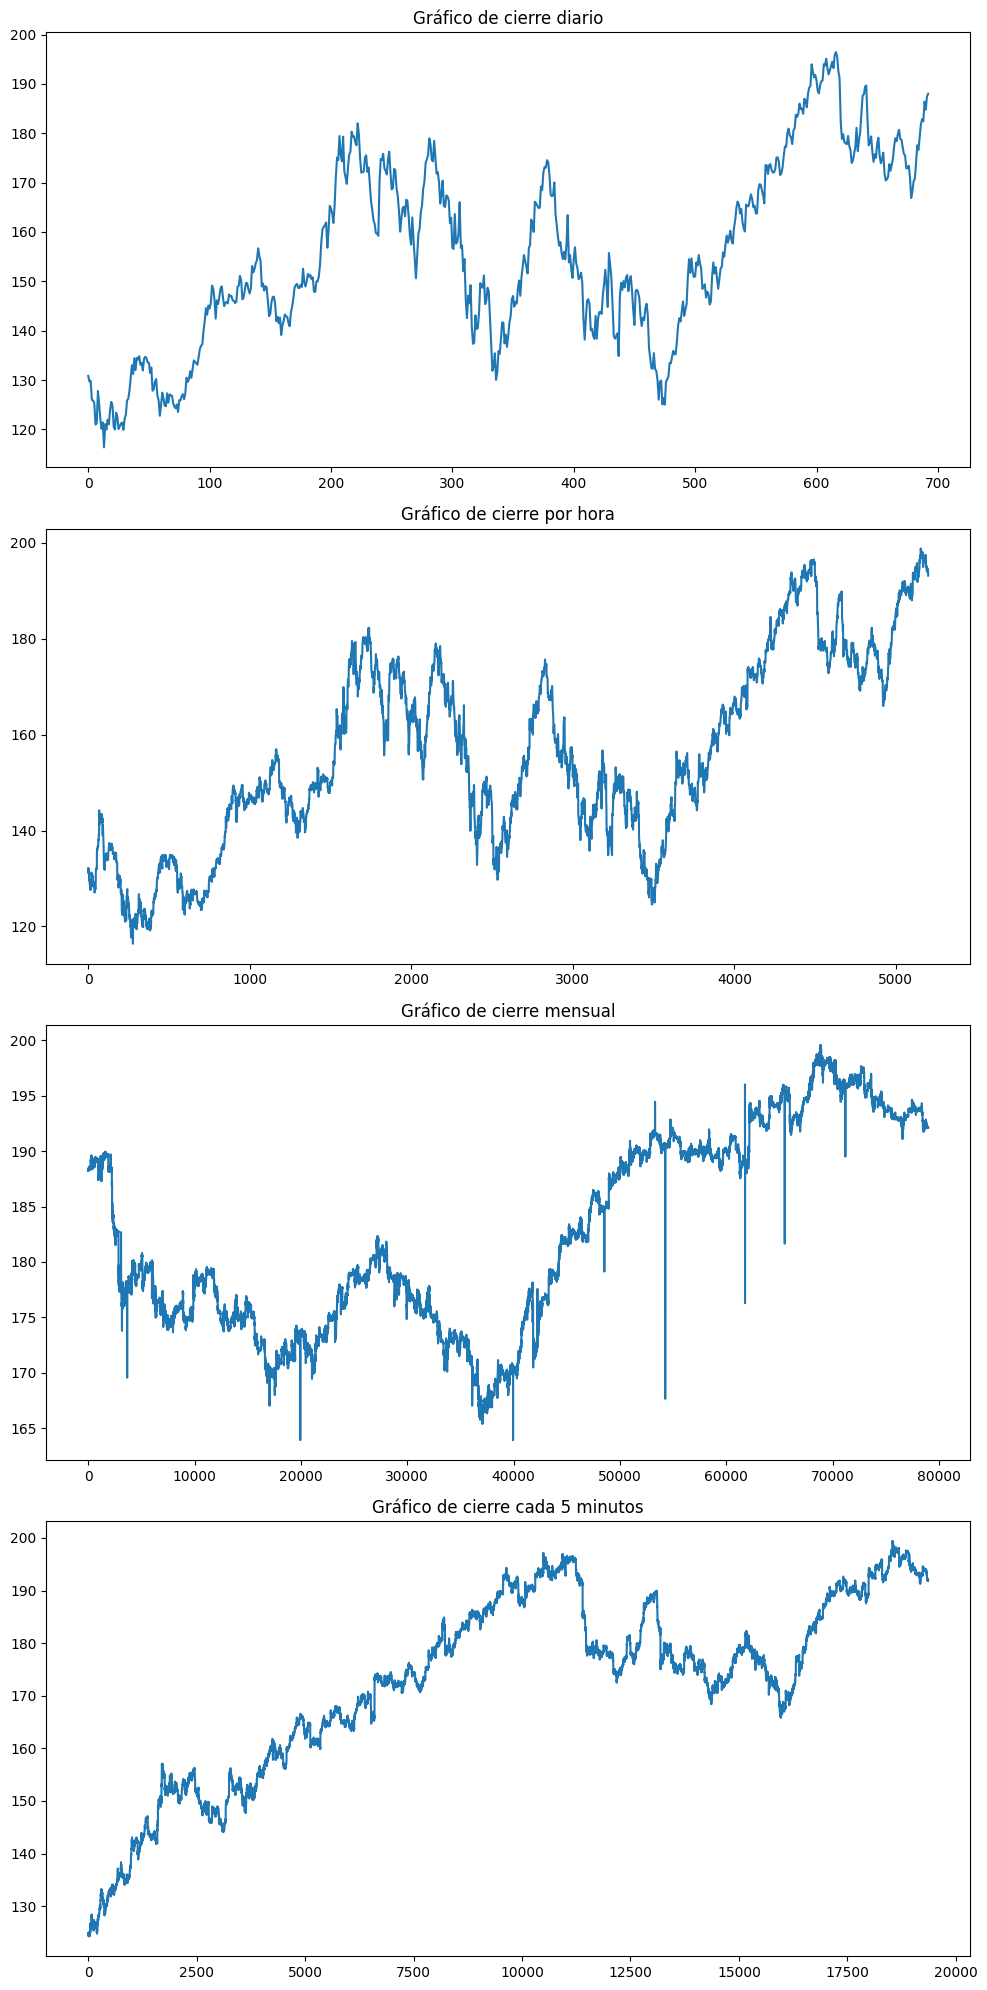

In [4]:
fig, axs = plt.subplots(4, figsize=(10, 20))
data_1d['Close'].plot(ax=axs[0])
axs[0].set_title('Gráfico de cierre diario')
data_1h['Close'].plot(ax=axs[1])
axs[1].set_title('Gráfico de cierre por hora')
data_1m['Close'].plot(ax=axs[2])
axs[2].set_title('Gráfico de cierre mensual')
data_5m['Close'].plot(ax=axs[3])
axs[3].set_title('Gráfico de cierre cada 5 minutos')
plt.tight_layout()
plt.show()

Las acciones de Apple (AAPL) han experimentado un crecimiento significativo en las últimas décadas. Desde su salida a bolsa en 1980, el precio de las acciones de Apple ha tenido varias tendencias alcistas y correcciones, pero en general ha mostrado una tendencia ascendente a largo plazo.

La variación del precio de las acciones de Apple a menudo está relacionada con el rendimiento de sus productos y la innovación tecnológica. El lanzamiento de nuevos productos exitosos, como el iPhone, iPad, Mac y servicios como Apple Music y Apple TV+, puede impulsar el precio de las acciones.

## Modelos de Deep Learning

Entre los modelos de Deep Learning se encuentra CNN, RNN, Transformadores y DNN.

Un modelo DNN, o Red Neuronal Profunda, es una técnica de aprendizaje automático que permite a una computadora realizar tareas que serían muy difíciles de lograr utilizando técnicas de programación convencionales. Estos modelos utilizan algoritmos de aprendizaje profundo para analizar grandes cantidades de datos y realizar tareas como detección de objetos, clasificación de imágenes, procesamiento de lenguaje natural, entre otros. Las redes neuronales profundas están compuestas por varias capas ocultas entre las capas de entrada y salida, lo que les permite modelar relaciones no lineales complejas y resolver problemas del mundo real, como la clasificación de datos.

Estos modelos se destacan por su capacidad para modelar relaciones no lineales complejas a través de capas ocultas entre las entradas y salidas. Estos modelos se destacan por su capacidad de entrenamiento para mejorar la precisión en la predicción, su flexibilidad en diversas aplicaciones de aprendizaje automático, incluyendo la regresión y clasificación, su uso en tareas avanzadas como detección de objetos, clasificación de imágenes y procesamiento de lenguaje natural, y su capacidad para entrenarse con conjuntos de datos extensos para mejorar la representación de características. Estas características hacen que los modelos DNN sean herramientas poderosas en el campo del aprendizaje automático, capaces de abordar tareas complejas y modelar relaciones no lineales en datos del mundo real.

### ¿Por qué escogerlo?

Nuestro criterio para seleccionarlo fue debido a que es un modelo clave debido a su capacidad para abordar tareas complejas que serían difíciles de realizar con técnicas de programación convencionales. Su flexibilidad en diversas aplicaciones de aprendizaje automático, su capacidad para modelar relaciones no lineales complejas, y su precisión mejorada con el entrenamiento, los convierten en una herramienta poderosa en el campo del aprendizaje automático. Además, su capacidad para reconocer patrones y aprender de manera autónoma, lo que les permite adaptarse a nuevas situaciones y datos en tiempo real. Esta capacidad de adaptación los hace ideales para aplicaciones en las que los requisitos y las condiciones cambian con el tiempo. Asimismo, su capacidad para manejar grandes volúmenes de datos de manera eficiente los convierte en una herramienta invaluable para el análisis de big data y la toma de decisiones basada en datos. En resumen, la combinación de flexibilidad, capacidad de aprendizaje autónomo y manejo eficiente de grandes conjuntos de datos hace que los modelos DNN sean una elección poderosa en el campo del aprendizaje automático.

## Definicion de variables independientes y dependiente

Con los conjuntos de datos proporcionados, se procede a la definición de nuevos dataframes que contienen las variables independientes junto con la variable dependiente ("response") para su posterior entrenamiento. Es importante destacar que se generan dos conjuntos de datos distintos: uno referente a las transacciones de compra y no compra, y otro relativo a las transacciones de venta y no venta. 

In [5]:
dataresult_long_1d_test = file_features("data/aapl_1d_test.csv", ds_type = "buy")
dataresult_long_1d_test = dataresult_long_1d_test.dropna()
dataresult_short_1d_test = file_features("data/aapl_1d_test.csv", ds_type = "sell")
dataresult_short_1d_test = dataresult_short_1d_test.dropna()
dataresult_short_1d_test.head()

,CMF,RSI,Volatility,Close_Lag0,Close_Lag1,Close_Lag2,Close_Lag3,Close_Lag4,Close_Lag5,Response
0,-0.150397,41.907869,2.75,130.84,133.19,135.37,135.13,135.39,136.01,True
1,0.003010,39.714419,2.59,129.71,130.84,133.19,135.37,135.13,135.39,True
2,0.084205,40.191750,1.91,129.87,129.71,130.84,133.19,135.37,135.13,True
3,-0.029780,33.319745,4.12,126.00,129.87,129.71,130.84,133.19,135.37,True
4,0.112971,33.099266,8.32,125.86,126.00,129.87,129.71,130.84,133.19,True


In [6]:
dataresult_long_1m_test = file_features("data/aapl_1m_test.csv", ds_type = "buy")
dataresult_long_1m_test = dataresult_long_1m_test.dropna()
dataresult_short_1m_test = file_features("data/aapl_1m_test.csv", ds_type = "sell")
dataresult_short_1m_test = dataresult_short_1m_test.dropna()
dataresult_short_1m_test.head()

,CMF,RSI,Volatility,Close_Lag0,Close_Lag1,Close_Lag2,Close_Lag3,Close_Lag4,Close_Lag5,Response
0,-0.672169,47.734613,0.03,188.22,188.19,188.20,188.25,188.23,188.19,False
1,-0.610246,51.069808,0.05,188.25,188.22,188.19,188.20,188.25,188.23,False
2,-0.607026,49.926144,0.00,188.24,188.25,188.22,188.19,188.20,188.25,False
3,-0.649422,49.926144,0.00,188.24,188.24,188.25,188.22,188.19,188.20,False
4,-0.419170,51.193736,0.04,188.25,188.24,188.24,188.25,188.22,188.19,False


In [7]:
dataresult_long_1h_test = file_features("data/aapl_1h_test.csv", ds_type = "buy")
dataresult_long_1h_test = dataresult_long_1h_test.dropna()
dataresult_short_1h_test = file_features("data/aapl_1h_test.csv", ds_type = "sell")
dataresult_short_1h_test = dataresult_short_1h_test.dropna()
dataresult_short_1h_test.head()

,CMF,RSI,Volatility,Close_Lag0,Close_Lag1,Close_Lag2,Close_Lag3,Close_Lag4,Close_Lag5,Response
0,-0.141211,60.423211,1.589905,132.154998,131.070007,130.380004,130.860000,131.210006,130.616806,True
1,-0.102683,54.168745,1.880005,131.115005,132.154998,131.070007,130.380004,130.860000,131.210006,True
2,0.001769,55.871543,1.320008,131.475006,131.115005,132.154998,131.070007,130.380004,130.860000,True
3,0.053753,57.288510,0.769699,131.773498,131.475006,131.115005,132.154998,131.070007,130.380004,True
4,0.133904,58.333594,0.580002,131.990005,131.773498,131.475006,131.115005,132.154998,131.070007,True


In [8]:
dataresult_long_5m_test = file_features("data/aapl_5m_test.csv", ds_type = "buy")
dataresult_long_5m_test = dataresult_long_5m_test.dropna()
dataresult_short_5m_test = file_features("data/aapl_5m_test.csv", ds_type = "sell")
dataresult_short_5m_test = dataresult_short_5m_test.dropna()
dataresult_short_5m_test.head()

,CMF,RSI,Volatility,Close_Lag0,Close_Lag1,Close_Lag2,Close_Lag3,Close_Lag4,Close_Lag5,Response
0,-0.238759,30.798433,0.160003,124.730003,124.742500,124.599899,124.849998,124.966003,125.230003,True
1,-0.254607,35.366789,0.349998,124.930000,124.730003,124.742500,124.599899,124.849998,124.966003,True
2,-0.185629,36.275150,0.235001,124.970100,124.930000,124.730003,124.742500,124.599899,124.849998,True
3,-0.136034,34.026357,0.235000,124.794998,124.970100,124.930000,124.730003,124.742500,124.599899,True
4,-0.101998,29.185824,0.520004,124.360000,124.794998,124.970100,124.930000,124.730003,124.742500,True


### Para el análisis de deep learning propuesto, utilizamos la misma logica que el proyecto pasado de machin learning ya que nos demostro buenos rendimientos: se establece una metodología que se sustenta en los siguientes puntos:
    
* Variables Independientes y Lagging:

La metodología se apoya en variables independientes, específicamente el precio de cierre (close price) de los activos financieros. Se genera un enfoque de lagging, el cual implica la creación de nuevas columnas que contienen información rezagada en el tiempo. Estas columnas con rezagos ayudan a capturar tendencias y patrones temporales en los datos históricos.
La inclusión de rezagos en el conjunto de datos es fundamental para mejorar el poder predictivo del modelo. Al considerar información pasada, el modelo puede identificar correlaciones y patrones que podrían afectar el comportamiento futuro de los precios.
Indicadores Técnicos CMF y RSI:

* Se integran indicadores técnicos clave en el análisis, como el Money Flow Index (CMF) y el Relative Strength Index (RSI).

Estos indicadores son herramientas comúnmente utilizadas en el análisis técnico de los mercados financieros.
El CMF es un indicador que evalúa el flujo de dinero dentro o fuera de un activo durante un período determinado, ayudando a identificar posibles cambios en la tendencia de precios.
Por otro lado, el RSI es un indicador que mide la fuerza y la velocidad del movimiento de los precios, permitiendo identificar condiciones de sobrecompra o sobreventa en un mercado.
La inclusión de estos indicadores en el análisis brinda al modelo una perspectiva más amplia sobre la dinámica del mercado y puede ayudar a identificar oportunidades de trading potenciales.
Volatilidad:

* La volatilidad es un componente crítico en el análisis de los mercados financieros. 

Se calcula como la medida de la variabilidad de los precios de un activo durante un período de tiempo específico. 
La inclusión de la volatilidad en el análisis permite al modelo tener en cuenta la incertidumbre y el riesgo asociado con el comportamiento de los precios.
Además, la volatilidad puede proporcionar información valiosa sobre la estabilidad y la dirección futura de los precios, lo que contribuye significativamente al poder predictivo del modelo.

* Variable dependiente (de respuesta)

Para la variable dependiente, la lógica subyacente se estructura de la siguiente manera: al comparar el precio de cierre actual con el precio de cierre de hace 10 días, se determina la acción a seguir en el mercado. Específicamente, si el precio de cierre actual es mayor que el de hace 10 días, se ejecuta una acción de venta; por el contrario, si es menor, se procede con una acción de compra. Este enfoque se aplica de manera análoga tanto para los conjuntos de datos correspondientes a las transacciones de compra como a las de venta. La definición y aplicación de esta lógica constituyen un aspecto crítico en la construcción de modelos de machine learning destinados a la predicción de movimientos financieros.

In [9]:
global_buy_signals_1d_long = buy_signals_1d_dl(dataresult_long_1d_test)
global_sell_signals_1d_short = sell_signals_1d_dl(dataresult_short_1d_test)
global_buy_signals_1h_long = buy_signals_1h_dl(dataresult_long_1h_test)
global_sell_signals_1h_short = sell_signals_1h_dl(dataresult_short_1h_test)
global_buy_signals_1m_long = buy_signals_1m_dl(dataresult_long_1m_test)
global_sell_signals_1m_short = sell_signals_1m_dl(dataresult_short_1m_test)
global_buy_signals_5m_long = buy_signals_5m_dl(dataresult_long_5m_test)
global_sell_signals_5m_short = sell_signals_5m_dl(dataresult_short_5m_test)
global_sell_signals_5m_short

Epoch 1/20
18/18 [==============================] - 3s 21ms/step - loss: 0.6922 - accuracy: 0.5343 - val_loss: 0.6335 - val_accuracy: 0.6691
Epoch 2/20
18/18 [==============================] - 0s 5ms/step - loss: 0.6825 - accuracy: 0.5542 - val_loss: 0.6418 - val_accuracy: 0.6691
Epoch 3/20
18/18 [==============================] - 0s 5ms/step - loss: 0.6740 - accuracy: 0.5848 - val_loss: 0.6619 - val_accuracy: 0.6403
Epoch 4/20
18/18 [==============================] - 0s 6ms/step - loss: 0.6677 - accuracy: 0.5848 - val_loss: 0.7465 - val_accuracy: 0.4388
Epoch 5/20
18/18 [==============================] - 0s 5ms/step - loss: 0.6712 - accuracy: 0.6029 - val_loss: 0.6640 - val_accuracy: 0.6547
Epoch 6/20
18/18 [==============================] - 0s 5ms/step - loss: 0.6704 - accuracy: 0.5921 - val_loss: 0.6100 - val_accuracy: 0.6763
Epoch 7/20
18/18 [==============================] - 0s 8ms/step - loss: 0.6660 - accuracy: 0.6029 - val_loss: 0.6993 - val_accuracy: 0.5252
Epoch 8/20
18/18 [=

Epoch 7/20
130/130 [==============================] - 0s 3ms/step - loss: 0.7358 - accuracy: 0.5031 - val_loss: 0.7039 - val_accuracy: 0.4256
Epoch 8/20
130/130 [==============================] - 0s 3ms/step - loss: 0.7258 - accuracy: 0.4901 - val_loss: 0.7069 - val_accuracy: 0.4256
Epoch 9/20
163/163 [==============================] - 1s 3ms/step
Epoch 1/20
130/130 [==============================] - 2s 6ms/step - loss: 4.5509 - accuracy: 0.5190 - val_loss: 0.6794 - val_accuracy: 0.5744
Epoch 2/20
130/130 [==============================] - 1s 6ms/step - loss: 0.7155 - accuracy: 0.5050 - val_loss: 0.6778 - val_accuracy: 0.5744
Epoch 3/20
130/130 [==============================] - 1s 6ms/step - loss: 0.7255 - accuracy: 0.5060 - val_loss: 0.7082 - val_accuracy: 0.4198
Epoch 4/20
130/130 [==============================] - 1s 7ms/step - loss: 0.7106 - accuracy: 0.5156 - val_loss: 0.6839 - val_accuracy: 0.5744
Epoch 5/20
130/130 [==============================] - 1s 8ms/step - loss: 0.7147 -

485/485 [==============================] - 1s 2ms/step - loss: 0.7117 - accuracy: 0.5136 - val_loss: 0.6934 - val_accuracy: 0.5130
Epoch 11/20
485/485 [==============================] - 1s 2ms/step - loss: 0.7025 - accuracy: 0.5183 - val_loss: 0.6946 - val_accuracy: 0.5058
Epoch 12/20
485/485 [==============================] - 1s 2ms/step - loss: 0.6983 - accuracy: 0.5208 - val_loss: 0.7083 - val_accuracy: 0.4673
Epoch 13/20
485/485 [==============================] - 1s 2ms/step - loss: 0.6980 - accuracy: 0.5233 - val_loss: 0.6923 - val_accuracy: 0.5298
Epoch 14/20
485/485 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5253 - val_loss: 0.6933 - val_accuracy: 0.5071
Epoch 15/20
485/485 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5216 - val_loss: 0.6918 - val_accuracy: 0.5316
Epoch 16/20
485/485 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5237 - val_loss: 0.6913 - val_accuracy: 0.5324
Epoch 17/20

,predicciones_dnn1,predicciones_dnn2,predicciones_dnn3
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
19359,0,0,0
19360,0,0,0
19361,0,0,0
19362,0,0,0


## Procesamiento y Fine Tuning

Tras definir la variable objetivo y establecer la lógica de operación, el proyecto de análisis de deep learning avanza hacia la etapa de preparación de datos y ajuste de modelos. Esta fase comienza con la división de los conjuntos de datos en conjuntos de entrenamiento y prueba, proporcionando así una base sólida para evaluar el desempeño de los modelos de deep learning.

Una vez divididos los conjuntos de datos, comienza el proceso de ajuste de hiperparámetros, también conocido como finetuning. En este contexto, el finetuning implica la optimización de los hiperparámetros de los modelos de deep learning para identificar las combinaciones óptimas que maximicen el rendimiento predictivo del modelo.

Durante el finetuning, se exploran y ajustan hiperparámetros como la tasa de aprendizaje, la arquitectura de la red neuronal, el número de capas y neuronas, entre otros. Esta exploración exhaustiva permite determinar qué combinaciones de hiperparámetros son más efectivas para cada modelo en particular.

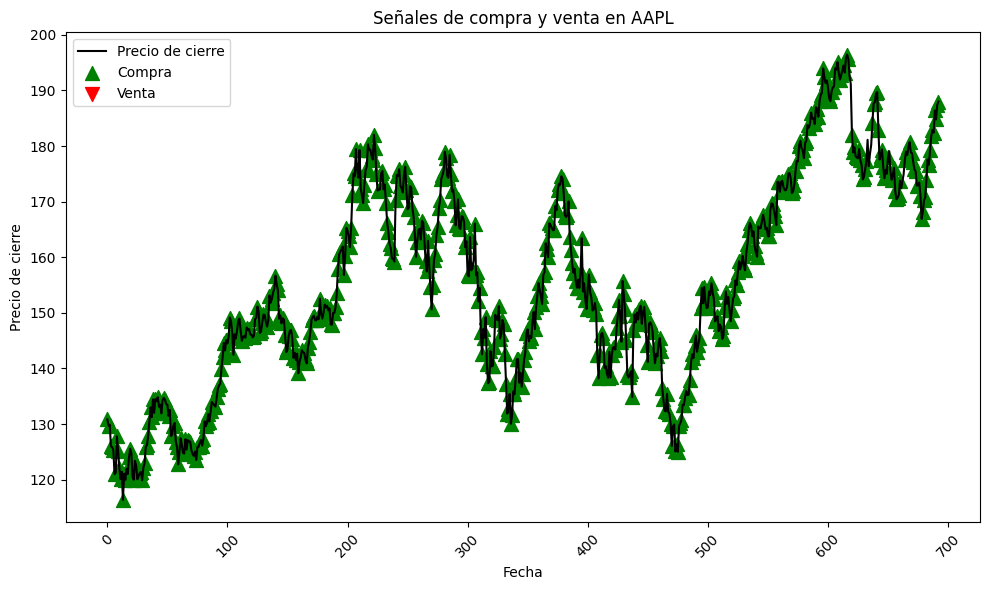

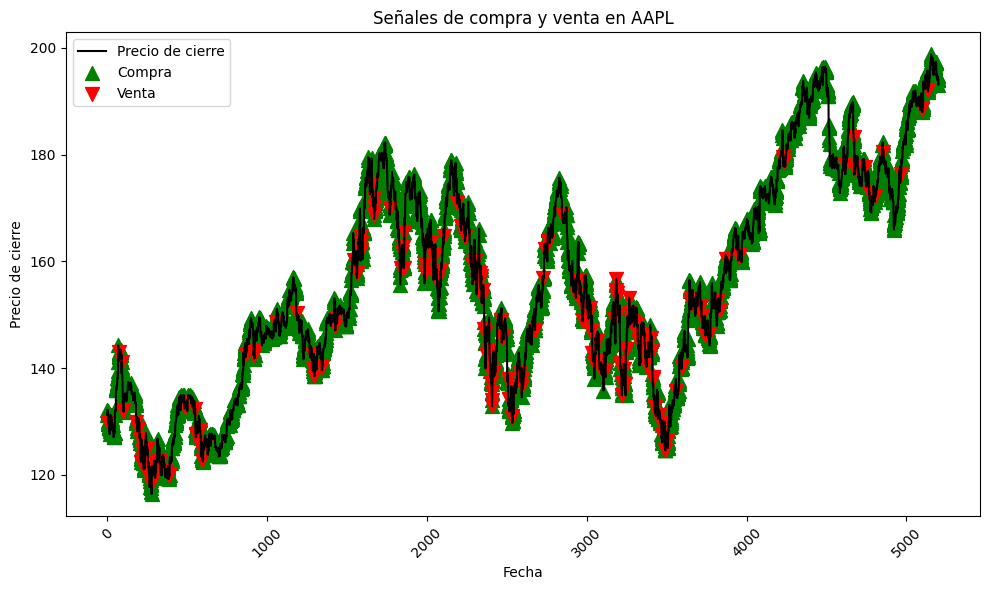

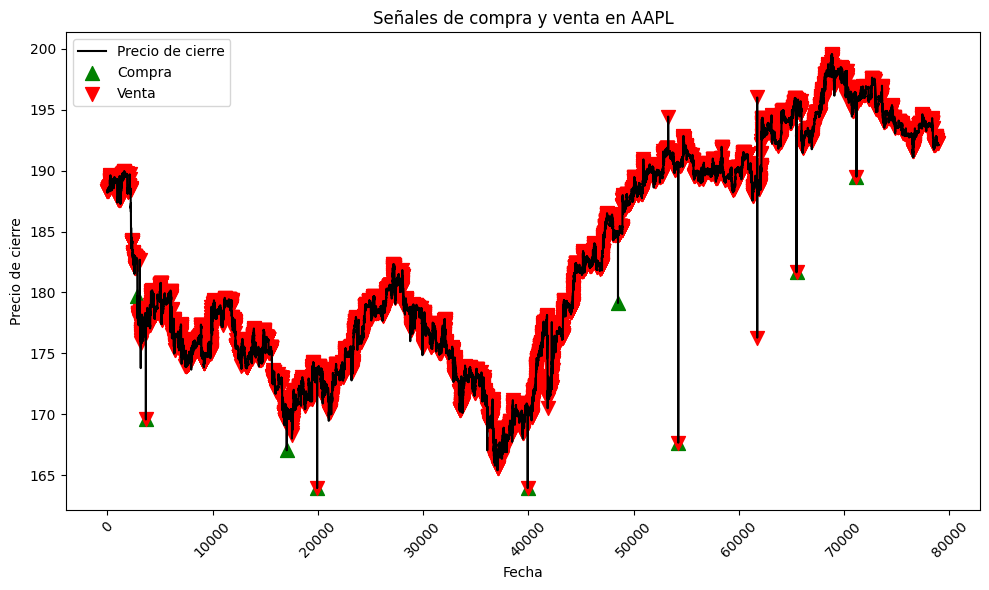

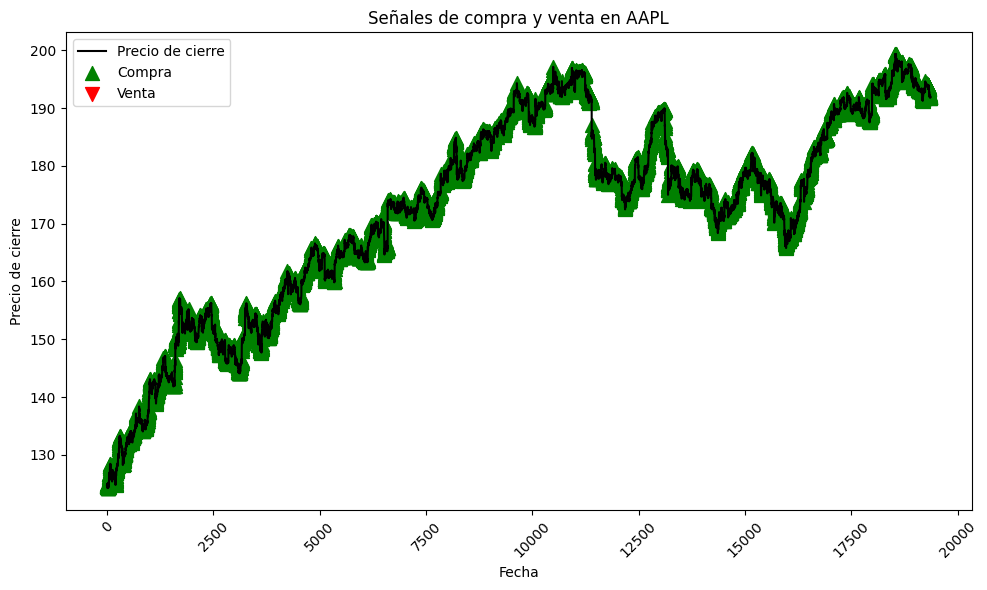

In [10]:
plot_signals(global_buy_signals_1d_long, global_sell_signals_1d_short, dataresult_short_1d_test)
plot_signals(global_buy_signals_1h_long, global_sell_signals_1h_short, dataresult_short_1h_test)
plot_signals(global_buy_signals_1m_long, global_sell_signals_1m_short, dataresult_short_1m_test)
plot_signals(global_buy_signals_5m_long, global_sell_signals_5m_short, dataresult_short_5m_test)

Como podemos ver, desde la definicion de nuestras predicciones de las senales de compra, podemos ver comportamientos extranos...

    En el dataset de 1 dia, nuestro modelo optimo nos dice que lo mejor es comprar siempre
    En el dataset de 1 hora, nuestro modelo optimo si tiene mas variabilidad a la hora de comprar o vender, pero esta mas sesgado a la compra
    En el dataset de 1 minuto, nuestro modelo optimo nos dice que lo mejor es hacer compras minimas, y siempre vender
    En el dataset de 5 minutos, nuestro modelo optimo tambien nos dice que lo mejor es comprar siempre

## Optimizacion y backtesting

Una vez se han determinado los parámetros óptimos para cada modelo mediante el proceso de fine-tuning en deep learning, el proyecto de análisis financiero procede a realizar un proceso de combinaciones con backtesting. En este enfoque, se busca identificar el modelo más efectivo y los parámetros óptimos a través de la evaluación del rendimiento financiero, específicamente mediante el análisis del profit.

El backtesting implica simular estrategias de trading utilizando datos históricos para evaluar el rendimiento de cada modelo y sus parámetros optimizados. Durante este proceso, se aplican las estrategias definidas previamente utilizando conjuntos de datos históricos para determinar su efectividad en términos de rentabilidad financiera.

El objetivo principal del backtesting es identificar la estrategia de trading que genere el mayor profit o beneficio. Este profit se calcula a partir de las ganancias y pérdidas generadas por las operaciones realizadas según las señales de compra y venta generadas por cada modelo y sus respectivos parámetros.

Al finalizar el proceso de optimización y backtesting, el código proporciona como resultado el mejor modelo, junto con los parámetros óptimos identificados durante el backtesting. Estos resultados representan la estrategia de trading más efectiva y rentable, basada en el análisis histórico de datos y la evaluación de su desempeño financiero.

Se presenta la funcion de backtesting que devuelve los parametros, ya con la funcion del backtesting y los parametros optimizados obtenidos por el proceso.

In [13]:
buy_signals_1d, sell_signals_1d = buy_sell(global_buy_signals_1d_long, global_sell_signals_1d_short)
portfolio_value_1d, capital_value_1d, transactions_1d = backtest1(data_1d, buy_signals_1d, sell_signals_1d, 0.8125662320480683, 1.099522023300722, 45)
buy_signals_1h, sell_signals_1h = buy_sell(global_buy_signals_1h_long, global_sell_signals_1h_short)
portfolio_value_1h, capital_value_1h, transactions_1h = backtest1(data_1h, buy_signals_1h, sell_signals_1h, 0.8045410770677325, 1.0999994091707832, 50)
buy_signals_1m, sell_signals_1m = buy_sell(global_buy_signals_1m_long, global_sell_signals_1m_short)
portfolio_value_1m, capital_value_1m, transactions_1m = backtest1(data_1m, buy_signals_1m, sell_signals_1m, 0.8246899075687136, 1.0966755803337889, 47)
buy_signals_5m, sell_signals_5m = buy_sell(global_buy_signals_5m_long, global_sell_signals_5m_short)
portfolio_value_5m, capital_value_5m, transactions_5m = backtest1(data_5m, buy_signals_5m, sell_signals_5m, 0.8412379579141974, 1.0997899401664173, 29)

### Modelos y parametros optimos

Los mejores parametros se muestran anteriormente en la funcion de backtest, mientras que los mejores modelos fueron: 

    1d: DNN1, DNN2
    1h: DNN1
    1m: DNN1
    5m: DNN1, DNN3

#### Dataset de 1 dia

Los mejores parametros para nuestro dataset de 1d en long, modelo DNN1 fueron: {'num_layers': 5, 'num_units_layer_0': 99, 'num_units_layer_1': 255, 'num_units_layer_2': 99, 'num_units_layer_3': 238, 'num_units_layer_4': 157, 'activation_layer_0': 'sigmoid', 'activation_layer_1': 'tanh', 'activation_layer_2': 'tanh', 'activation_layer_3': 'tanh', 'activation_layer_4': 'tanh', 'learning_rate': 0.00018386130982200606}

Para el modelo DNN2: {'num_layers': 6, 'num_units_layer_0': 120, 'num_units_layer_1': 109, 'num_units_layer_2': 158, 'num_units_layer_3': 104, 'num_units_layer_4': 178, 'num_units_layer_5': 164, 'activation_layer_0': 'selu', 'activation_layer_1': 'relu', 'activation_layer_2': 'selu', 'activation_layer_3': 'relu', 'activation_layer_4': 'selu', 'activation_layer_5': 'relu', 'learning_rate': 0.00011545356469724032}

Los mejores parametros para nuestro dataset de 1d en short, modelo DNN1 fueron: {'num_layers': 1, 'num_units_layer_0': 68, 'activation_layer_0': 'sigmoid', 'learning_rate': 0.012725657117983725}

Para el modelo DNN2: {'num_layers': 3, 'num_units_layer_0': 191, 'num_units_layer_1': 153, 'num_units_layer_2': 185, 'activation_layer_0': 'sigmoid', 'activation_layer_1': 'selu', 'activation_layer_2': 'selu', 'learning_rate': 0.0023909850276938767}

#### Dataset de 1 hora

Los mejores parametros para nuestro dataset de 1h en long, modelo DNN1 fueron: {'num_layers': 5, 'num_units_layer_0': 195, 'num_units_layer_1': 197, 'num_units_layer_2': 166, 'num_units_layer_3': 36, 'num_units_layer_4': 38, 'activation_layer_0': 'relu', 'activation_layer_1': 'relu', 'activation_layer_2': 'tanh', 'activation_layer_3': 'sigmoid', 'activation_layer_4': 'sigmoid', 'learning_rate': 0.00022097125380689752}

Los mejores parametros para nuestro dataset de 1h en short, modelo DNN1 fueron: {'num_layers': 1, 'num_units_layer_0': 252, 'activation_layer_0': 'relu', 'learning_rate': 0.00017388198812466542}

#### Dataset de 1 minuto

Los mejores parametros para nuestro dataset de 1m en long, modelo DNN1 fueron: {'num_layers': 2, 'num_units_layer_0': 64, 'num_units_layer_1': 108, 'activation_layer_0': 'relu', 'activation_layer_1': 'sigmoid', 'learning_rate': 0.00022834017269211617}

Los mejores parametros para nuestro dataset de 1m en short, modelo DNN1 fueron: {'num_layers': 1, 'num_units_layer_0': 42, 'activation_layer_0': 'relu', 'learning_rate': 0.0003419209078643625}

#### Dataset de 5 minutos

Los mejores parametros para nuestro dataset de 5m en long, modelo DNN1 fueron: {'num_layers': 1, 'num_units_layer_0': 48, 'activation_layer_0': 'sigmoid', 'learning_rate': 0.00011910937340114574}

Para el modelo DNN3: {'num_layers': 2, 'num_units_layer_0': 173, 'num_units_layer_1': 463, 'activation_layer_0': 'elu', 'activation_layer_1': 'elu', 'learning_rate': 1.4196702540553977e-05}

Los mejores parametros para nuestro dataset de 5m en short, modelo DNN1 fueron: {'num_layers': 2, 'num_units_layer_0': 178, 'num_units_layer_1': 115, 'activation_layer_0': 'relu', 'activation_layer_1': 'relu', 'learning_rate': 0.0011702775156435393}

Para el modelo DNN3: {'num_layers': 5, 'num_units_layer_0': 89, 'num_units_layer_1': 195, 'num_units_layer_2': 127, 'num_units_layer_3': 199, 'num_units_layer_4': 130, 'activation_layer_0': 'selu', 'activation_layer_1': 'elu', 'activation_layer_2': 'relu', 'activation_layer_3': 'selu', 'activation_layer_4': 'relu', 'learning_rate': 0.00036584504741541676}

### Evolucion del portafolio atraves del tiempo

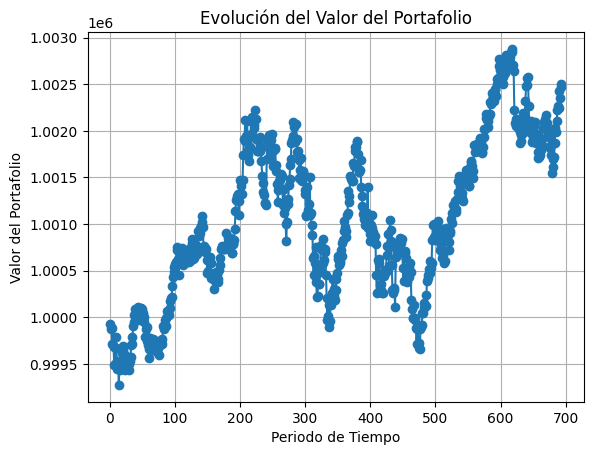

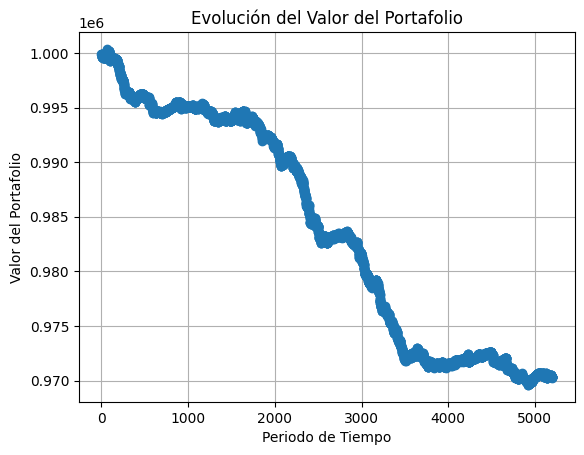

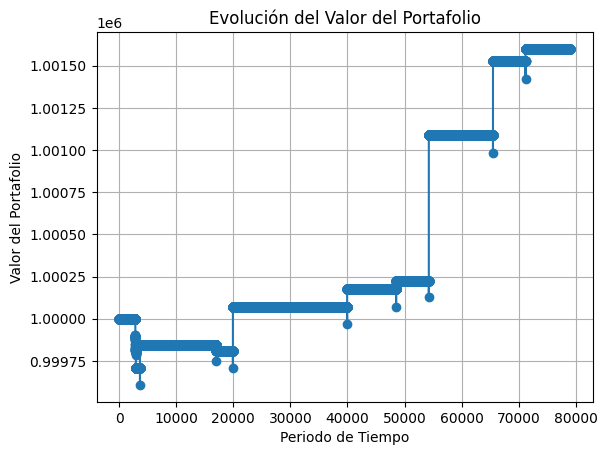

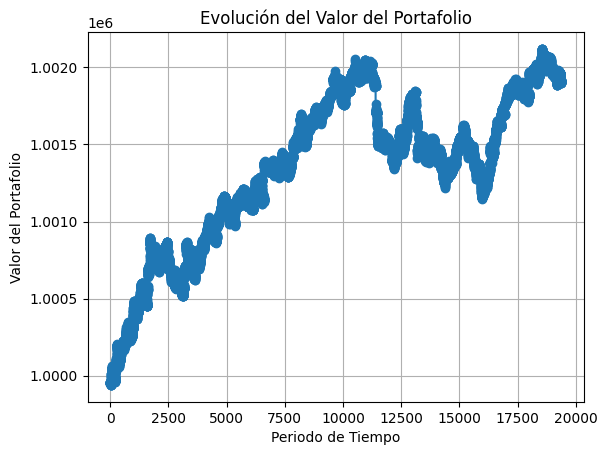

In [14]:
port_value_plot(portfolio_value_1d)
port_value_plot(portfolio_value_1h)
port_value_plot(portfolio_value_1m)
port_value_plot(portfolio_value_5m)

Como podemos observar, nuestros modelos en general, a pesar de no tener tan buen accuracy como vamos a profundizar mas adelente, nos dan en 3 de los 4 archivos, rendimientos positivos en general, esto en los data sets de: 1d, 5m y 1m. Mientras que en el dataset de 1h, es el unico que nos dio perdidas.

### Operaciones realizadas

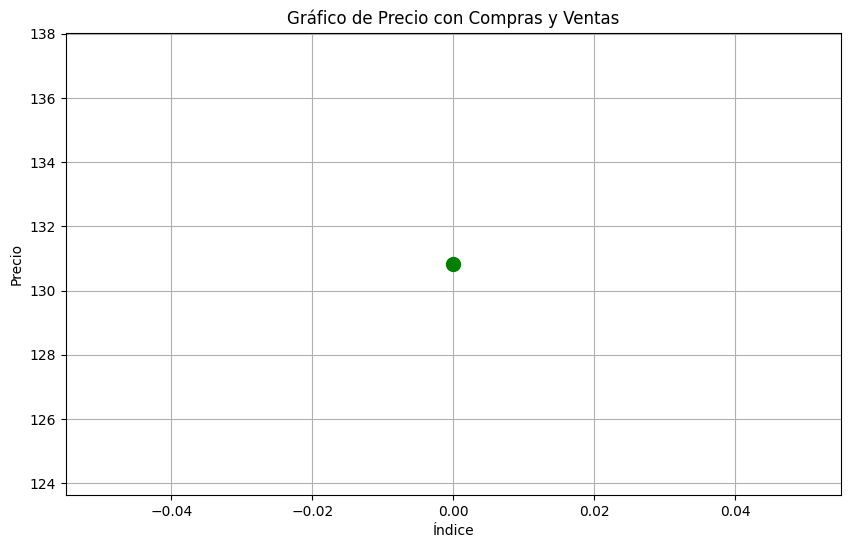

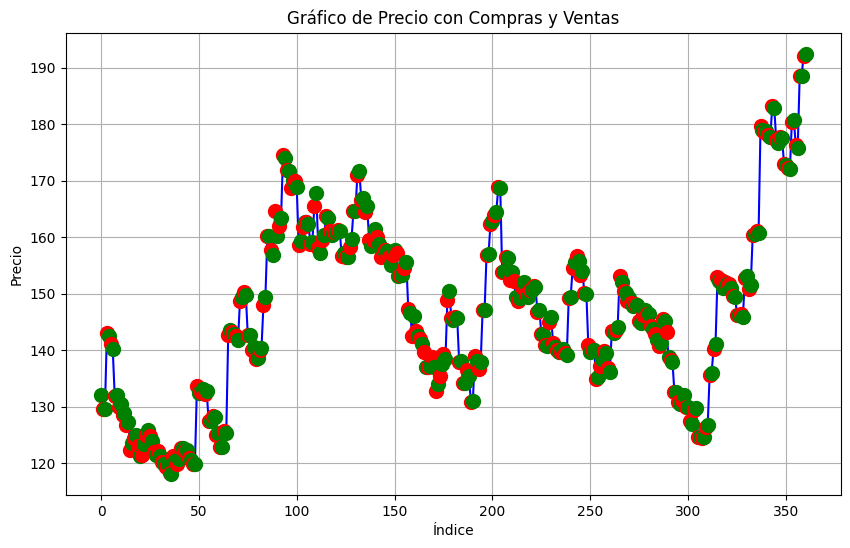

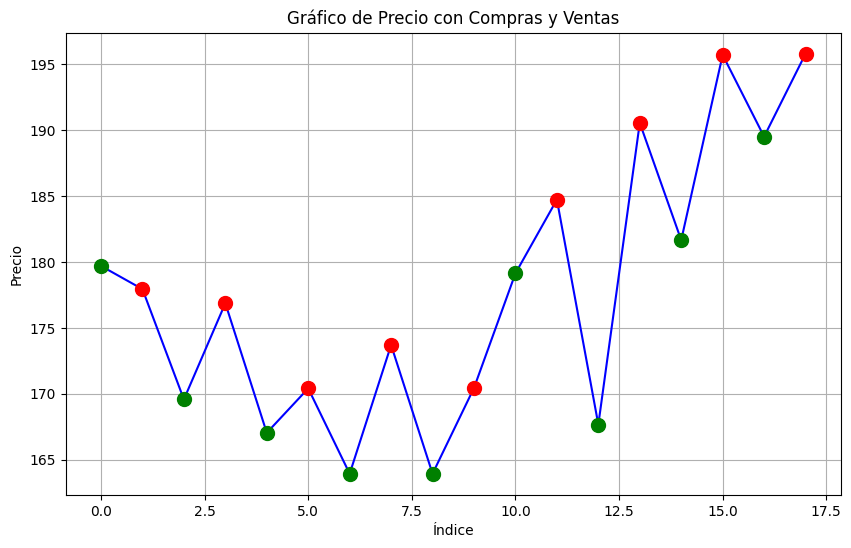

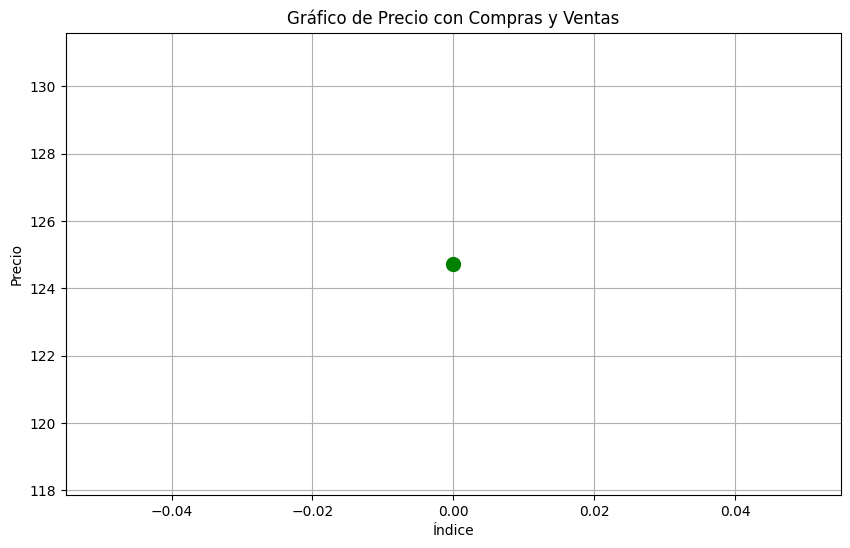

In [15]:
plot_transacciones(transactions_1d)
plot_transacciones(transactions_1h)
plot_transacciones(transactions_1m)
plot_transacciones(transactions_5m)

A la hora de graficar las transacciones, podemos confirmar que, como vimos en las graficas anterior, nuestro primer modelo decidio solamente comprar todo de una vez, es por eso que solo aparece un punto graficado. Esto se repite en la ultima grafica con el ultimo modelo.

En la siguiente grafica podemos observar que este modelo fue el que mas compra/ventas hizo. Con casi 350. (Algo no muy significante). A diferencia de las siguiente grafica que si compro y vendio, pero todavia menos. 

## Resultados obtenidos

A continuacion se presenta la evolucion del dinero y del portafolio atraves de nuestra estrategia de trading, y como se esta se compara con una estrategia pasiva.

#### Dinero atraves del tiempo de 1 dia

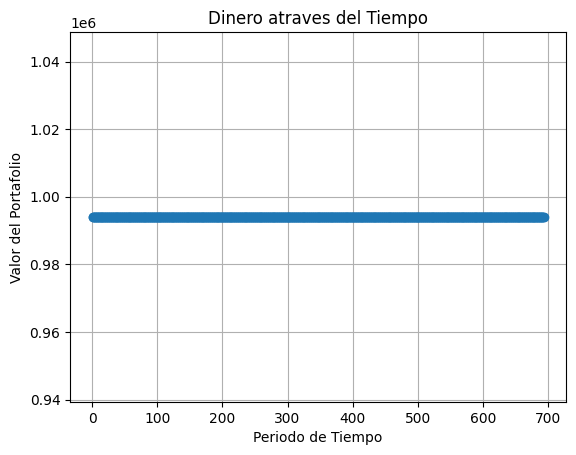

In [19]:
plot_cash(capital_value_1d)

Como podemos observar en la estrategia optima que tomo el modelo, decidio que era mejor comprar al principio, y despues no hacer nada, por lo que tenemos nuestro dinero constante, sin fluctuaciones.

#### Dinero atraves del tiempo de 1 hora

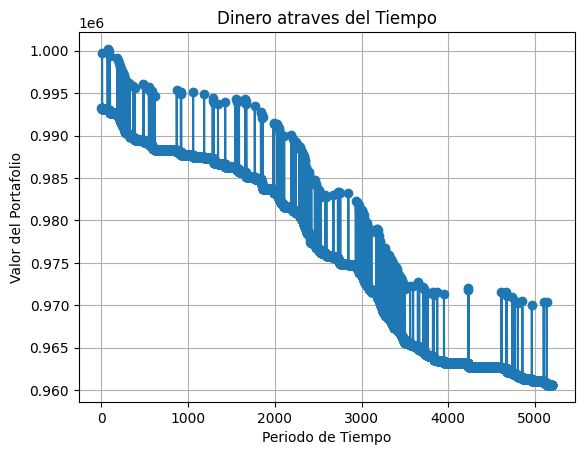

In [20]:
plot_cash(capital_value_1h)

A diferencia de la grafica de 1 dia, aqui podemos observar como el dinero que tenemos va fluctuando conforme el paso del tiempo, teniendo ganancias y perdidas conforme vamos comprando o vendiendo. 

#### Dinero atraves del tiempo de 1 minuto

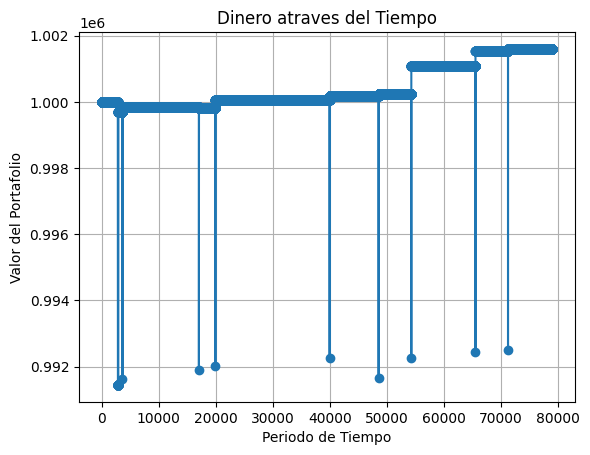

In [21]:
plot_cash(capital_value_1m)

En esta grafica, especificamente podemos ver mas claramente la estrategia, siendo que en su mayoria nos mantenemos neutrales ante alguna compra o venta. Y solamente bajo ciertas situaciones el modelo decide comprar o vender.

#### Dinero atraves del tiempo de 5 minutos

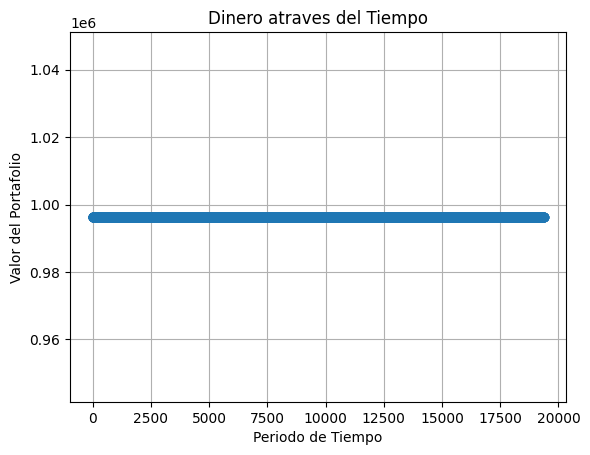

In [22]:
plot_cash(capital_value_5m)

En la grafica podemos ver exactamente el mismo caso que con el archivo de 1 dia, el modelo decide que lo optimo es comprar una vez, y no hacer mas.

## Comparando resultados

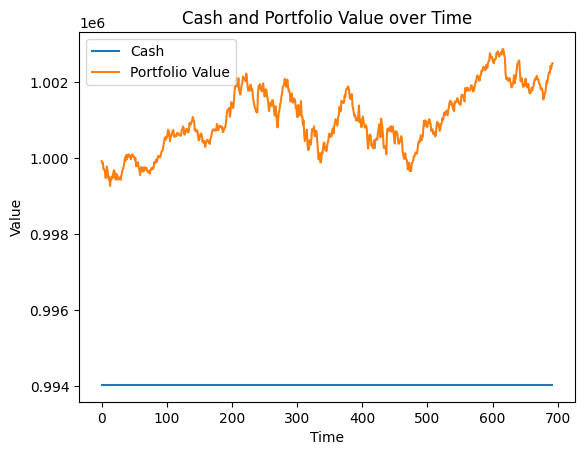

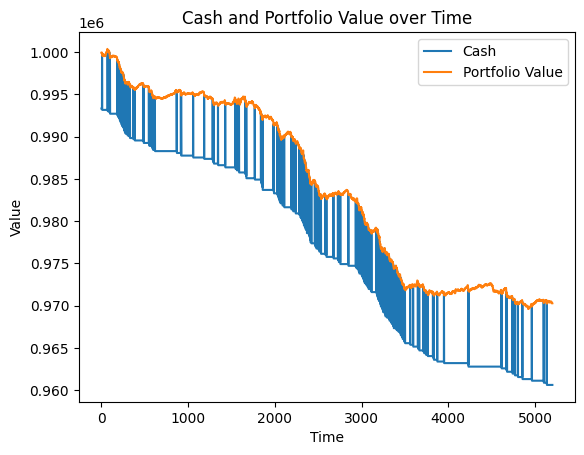

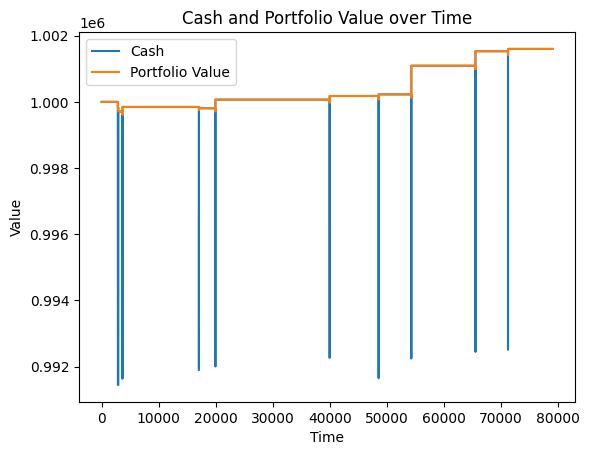

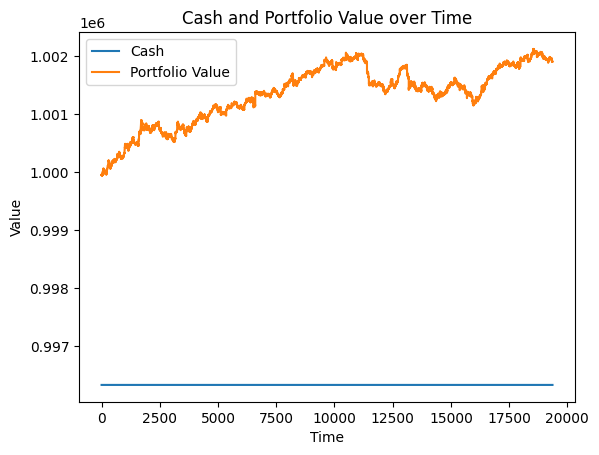

In [17]:
cash_portvalue_plot(capital_value_1d, portfolio_value_1d)
cash_portvalue_plot(capital_value_1h, portfolio_value_1h)
cash_portvalue_plot(capital_value_1m, portfolio_value_1m)
cash_portvalue_plot(capital_value_5m, portfolio_value_5m)

Como podemos ver, al menos a nivel de comparar el dinero que teniamos con nuestro portafolio, si tenemos un mayor rendimiento, esto es algo logico ya que al principio a fuerza tenemos que comprar para tener rendimientos.

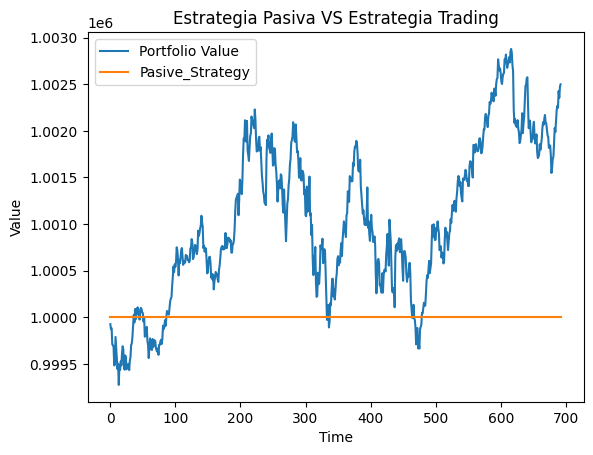

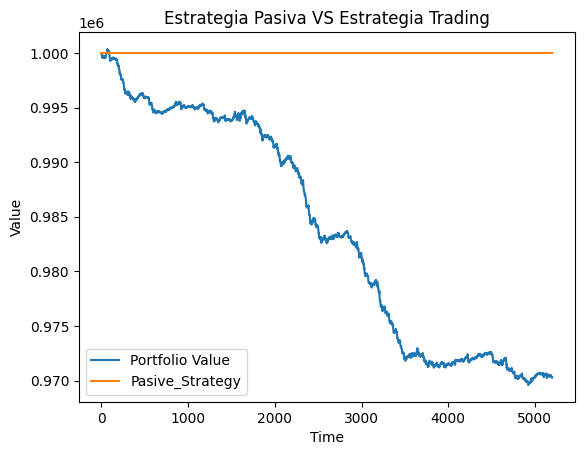

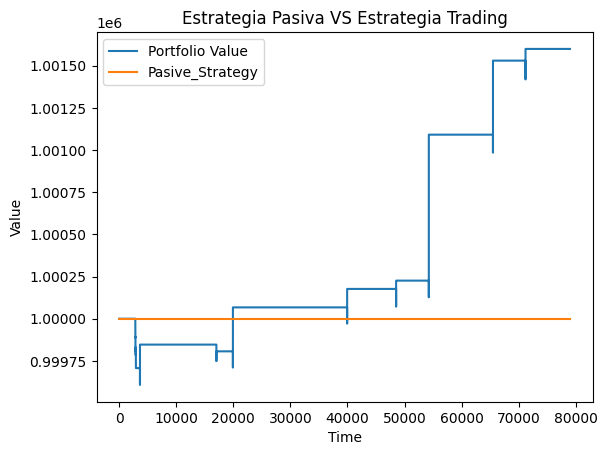

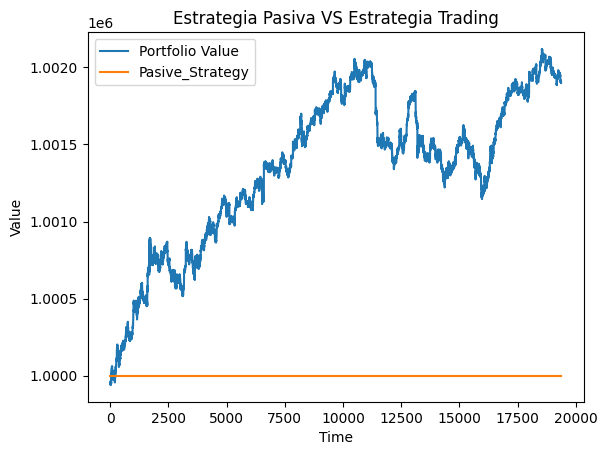

In [18]:
pasive_portvalue_plot(portfolio_value_1d)
pasive_portvalue_plot(portfolio_value_1h)
pasive_portvalue_plot(portfolio_value_1m)
pasive_portvalue_plot(portfolio_value_5m)

Al comparar nuestros modelos con una estrategia pasiva podemos notar varias cosas, como que, apesar de que nuestros modelos no tuvieron mucho exito en predecir de la manera mas eficiente cuando comprar o cuando vender, podemos observar que en el dataset de 1 dia, 1 minuto y 5 minutos. Efectivamente tenemos ganancias comparadas con una estrategia pasiva, es decir simplemente quedarte con el 1,000,000 y no hacer nada mas.

## Conclusiones

Al comparar nuestros modelos con una estrategia pasiva de simplemente mantener el capital inicial, podemos extraer varias conclusiones:

    Ganancias versus estrategia pasiva: A pesar de que nuestros modelos no lograron predecir de manera óptima los momentos de compra y venta, observamos que en los intervalos de tiempo más cortos del dataset (1 día, 1 minuto y 5 minutos), logramos obtener ganancias comparadas con la estrategia pasiva. Esto sugiere que, aunque imperfectos, nuestros modelos lograron generar un rendimiento superior al no hacer nada.

    Mayor rendimiento inicialmente: Es lógico que al principio, al iniciar con un portafolio de $1,000,000, tengamos que realizar compras para generar rendimientos. Esto explica el rendimiento superior inicial de nuestros modelos en comparación con la estrategia pasiva.

    Patrones de transacciones: Al graficar las transacciones realizadas por nuestros modelos, observamos que el primer modelo optó por comprar todo de una vez, mientras que el último modelo mostró un mayor número de compras y ventas, aunque estas fueron menos significativas en cantidad.

    Conclusiones generales: A pesar de las limitaciones y errores en la predicción de los momentos óptimos de compra y venta, nuestros modelos lograron generar ganancias en comparación con una estrategia pasiva. Esto indica que, aunque hay margen para mejorar la eficiencia en la toma de decisiones, nuestros modelos demostraron cierto grado de capacidad para generar rendimientos en el mercado financiero. Sin embargo, es importante seguir refinando y mejorando estos modelos para maximizar su eficacia y minimizar posibles pérdidas.